## Downloading a Structure File from the PDB database

In [1]:
from Bio.PDB import *
import nglview as nv

pdbl = PDBList()
pdbl.retrieve_pdb_file('1FAT')

Structure exists: '/home/emmy/Desktop/310.ai/fa/1fat.cif' 


'/home/emmy/Desktop/310.ai/fa/1fat.cif'

## Visualizing with the CIF Format

In [2]:
cif_parser = MMCIFParser()
structure = cif_parser.get_structure("1FAT", "fa/1fat.cif")

/home/emmy/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7168.
  warnings.warn(
/home/emmy/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7184.
  warnings.warn(
/home/emmy/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7200.
  warnings.warn(
/home/emmy/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7216.
  warnings.warn(
/home/emmy/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7232.
  warnings.warn(
/home/emmy/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 723

In [3]:
def cleandir(obj):
    print(", ".join([a for a in dir(obj) if not a.startswith("_")]))
cleandir(structure)

add, atom_to_internal_coordinates, center_of_mass, child_dict, child_list, copy, detach_child, detach_parent, full_id, get_atoms, get_chains, get_full_id, get_id, get_iterator, get_level, get_list, get_models, get_parent, get_residues, has_id, header, id, insert, internal_to_atom_coordinates, level, parent, set_parent, transform, xtra


In [4]:
view = nv.show_biopython(structure)
view

NGLWidget()

## Accessing Protein Information

In [5]:
# Header
mmcif_dict = MMCIF2Dict.MMCIF2Dict("fa/1fat.cif")
len(mmcif_dict)

689

This generates a large dictionary of information about the protein, including the citation that sequenced the protein, structure information, atom by atom location and angles, and chemical compositions. As you can see, there are 689 items in this dictionary.

The Structure object in our file follows the SMCRA architecture in a parent-child relationship:

- A Structure consists of models
- A Model consists of chains
- A Chain consists of residues (amino acids)
- A Residue consists of Atoms

In [6]:
# Building Polypeptides

polypeptide_builder = CaPPBuilder()
counter = 1

for polypeptide in polypeptide_builder.build_peptides(structure):
    seq = polypeptide.get_sequence()
    print(f"Sequence: {counter}, Length: {len(seq)}")
    print(seq, "\n")
    counter += 1

Sequence: 1, Length: 36
SNDIYFNFQRFNETNLILQRDASVSSSGQLRLTNLN 

Sequence: 2, Length: 196
NGEPRVGSLGRAFYSAPIQIWDNTTGTVASFATSFTFNIQVPNNAGPADGLAFALVPVGSQPKDKGGFLGLFDGSNSNFHTVAVEFDTLYNKDWDPTERHIGIDVNSIRSIKTTRWDFVNGENAEVLITYDSSTNLLVASLVYPSQKTSFIVSDTVDLKSVLPEWVSVGFSATTGINKGNVETNDVLSWSFASKLS 

Sequence: 3, Length: 233
SNDIYFNFQRFNETNLILQRDASVSSSGQLRLTNLNGNGEPRVGSLGRAFYSAPIQIWDNTTGTVASFATSFTFNIQVPNNAGPADGLAFALVPVGSQPKDKGGFLGLFDGSNSNFHTVAVEFDTLYNKDWDPTERHIGIDVNSIRSIKTTRWDFVNGENAEVLITYDSSTNLLVASLVYPSQKTSFIVSDTVDLKSVLPEWVSVGFSATTGINKGNVETNDVLSWSFASKLS 

Sequence: 4, Length: 36
SNDIYFNFQRFNETNLILQRDASVSSSGQLRLTNLN 

Sequence: 5, Length: 196
NGEPRVGSLGRAFYSAPIQIWDNTTGTVASFATSFTFNIQVPNNAGPADGLAFALVPVGSQPKDKGGFLGLFDGSNSNFHTVAVEFDTLYNKDWDPTERHIGIDVNSIRSIKTTRWDFVNGENAEVLITYDSSTNLLVASLVYPSQKTSFIVSDTVDLKSVLPEWVSVGFSATTGINKGNVETNDVLSWSFASKLS 

Sequence: 6, Length: 35
SNDIYFNFQRFNETNLILQRDASVSSSGQLRLTNL 

Sequence: 7, Length: 196
NGEPRVGSLGRAFYSAPIQIWDNTTGTVASFATSFTFNIQVPNNAGPADGLAFALVPVGSQPKDKGGFLGLFDGSNSN

# Analyzing Residues Sequences

In [7]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [8]:
analyzed_seq = ProteinAnalysis(str(seq))

# Molecular Weight

In [9]:
analyzed_seq.molecular_weight()

21164.201100000006

# GRAVY

Returns the GRAVY (grand average of hydropathy) value for the protein sequences you enter. 

In [10]:
analyzed_seq.gravy()

-0.0959183673469388

# Amino Acid Count

Count the number of types of amino acids.

analyzed_seq.count_amino_acids()

# Amino Acid Percent

And the percentage of each amino acid in the sequence!

In [14]:
analyzed_seq.get_amino_acids_percent()

{'A': 0.0663265306122449,
 'C': 0.0,
 'D': 0.0663265306122449,
 'E': 0.03571428571428571,
 'F': 0.0663265306122449,
 'G': 0.08163265306122448,
 'H': 0.01020408163265306,
 'I': 0.05102040816326531,
 'K': 0.04081632653061224,
 'L': 0.07142857142857142,
 'M': 0.0,
 'N': 0.07653061224489796,
 'P': 0.04591836734693878,
 'Q': 0.02040816326530612,
 'R': 0.025510204081632654,
 'S': 0.11224489795918367,
 'T': 0.08673469387755102,
 'V': 0.09693877551020408,
 'W': 0.025510204081632654,
 'Y': 0.02040816326530612}

In [15]:
analyzed_seq.secondary_structure_fraction() # helix, turn, sheet

(0.33163265306122447, 0.3163265306122449, 0.17346938775510204)

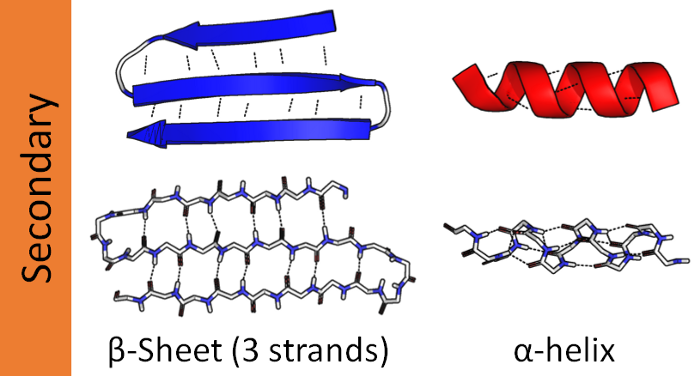

# Protein Scales

In [18]:
from Bio.SeqUtils.ProtParam import ProtParamData

Some common scales include:
- kd → Kyte & Doolittle Index of Hydrophobicity [Original Article]
- Flex → Normalized average flexibility parameters (B-values) [Original Article]
- hw → Hopp & Wood Index of Hydrophilicity [Original Article]
- em → Emini Surface fractional probability (Surface Accessibility) [Original Book]

In [19]:
analyzed_seq.protein_scale(window=7, param_dict = ProtParamData.kd)

[-1.3857142857142857,
 -1.0,
 -0.4000000000000001,
 0.04285714285714288,
 -0.3714285714285714,
 0.5285714285714285,
 0.32857142857142857,
 0.20000000000000004,
 0.19999999999999996,
 -0.08571428571428573,
 -0.2571428571428571,
 1.0285714285714287,
 0.2714285714285714,
 0.5142857142857143,
 0.5714285714285714,
 0.1857142857142857,
 -0.5714285714285714,
 -0.4428571428571429,
 -1.1857142857142857,
 -0.742857142857143,
 -1.4857142857142855,
 -0.7571428571428571,
 1.586032892321652e-17,
 0.38571428571428573,
 0.8857142857142856,
 1.242857142857143,
 1.1999999999999997,
 1.1857142857142857,
 0.9857142857142857,
 0.6285714285714284,
 1.1428571428571428,
 0.2428571428571428,
 0.6285714285714284,
 0.2285714285714285,
 0.9428571428571428,
 0.31428571428571433,
 -0.08571428571428578,
 -0.9857142857142857,
 -0.2285714285714286,
 -0.9285714285714286,
 -0.6571428571428571,
 -0.9999999999999999,
 -1.2714285714285716,
 -0.8285714285714284,
 0.21428571428571433,
 0.21428571428571427,
 0.671428571428571